In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
opioid_prescription = "Opioid_prescription_data.csv"

# read as df
opioid_df = pd.read_csv(opioid_prescription)

In [3]:
opioid_df.head()

,FIPS,State,County,MME_PerCap_2010,MME_PerCap_2015,Quartile_2015,2010-2015_Change
0,2050,AK,BETHEL,NaN,NaN,NaN,NaN
1,2068,AK,DENALI,NaN,NaN,NaN,NaN
2,2013,AK,ALEUTIANS EAST,NaN,NaN,NaN,NaN
3,2016,AK,ALEUTIANS WEST,NaN,NaN,NaN,NaN
4,2240,AK,SOUTHEAST FAIRBANKS,NaN,NaN,NaN,NaN


In [4]:
# clean data (drop NA, remove unecessary columns)
opioid_df=opioid_df.drop(columns=['FIPS'])
opioid_df=opioid_df.dropna()
opioid_df

,State,County,MME_PerCap_2010,MME_PerCap_2015,Quartile_2015,2010-2015_Change
17,AK,KENAI PENINSULA,1362.1,1343.7,4.0,Stable
18,AK,MATANUSKA SUSITNA,930.4,869.3,3.0,Stable
19,AK,ANCHORAGE,863.8,808.9,3.0,Stable
20,AK,KETCHIKAN GATEWAY,817.4,731.1,3.0,Decreased
21,AK,PETERSBURG,1017.7,682.9,3.0,Decreased
...,...,...,...,...,...,...
3137,WY,ALBANY,458.4,410.9,1.0,Decreased
3138,WY,TETON,406.3,387.8,1.0,Stable
3139,WY,CAMPBELL,581.7,384.7,1.0,Decreased
3140,WY,GOSHEN,601.4,375.4,1.0,Decreased


In [12]:
# Groupby state
prescription_by_state=opioid_df.groupby(['State'])['MME_PerCap_2010','MME_PerCap_2015'].sum()
state_df=pd.DataFrame(prescription_by_state)
#reset index
state_df=state_df.reset_index()
state_df

,State,MME_PerCap_2010,MME_PerCap_2015
0,AK,7400.0,6097.7
1,AL,61744.7,63231.0
2,AR,61462.1,59221.7
3,AZ,14909.2,13493.5
4,CA,59583.8,47343.8
5,CO,37751.5,32495.4
6,CT,5890.4,5421.3
7,DC,240.3,205.9
8,DE,4642.6,3188.5
9,FL,82132.6,51563.9


In [16]:
number_days_prescription_2010=state_df['MME_PerCap_2010'].div(48.1)
number_days_prescription_2015=state_df['MME_PerCap_2015'].div(48.1)
state_df['Number of Days of Prescriptions 2010'] = number_days_prescription_2010
state_df['Number of Days of Prescriptions 2015'] = number_days_prescription_2015
state_df

,State,MME_PerCap_2010,MME_PerCap_2015,Number of Days of Prescriptions 2010,Number of Days of Prescriptions 2015
0,AK,7400.0,6097.7,153.846154,126.771310
1,AL,61744.7,63231.0,1283.673597,1314.573805
2,AR,61462.1,59221.7,1277.798337,1231.220374
3,AZ,14909.2,13493.5,309.962578,280.530146
4,CA,59583.8,47343.8,1238.748441,984.278586
5,CO,37751.5,32495.4,784.854470,675.580042
6,CT,5890.4,5421.3,122.461538,112.708940
7,DC,240.3,205.9,4.995842,4.280665
8,DE,4642.6,3188.5,96.519751,66.288981
9,FL,82132.6,51563.9,1707.538462,1072.014553


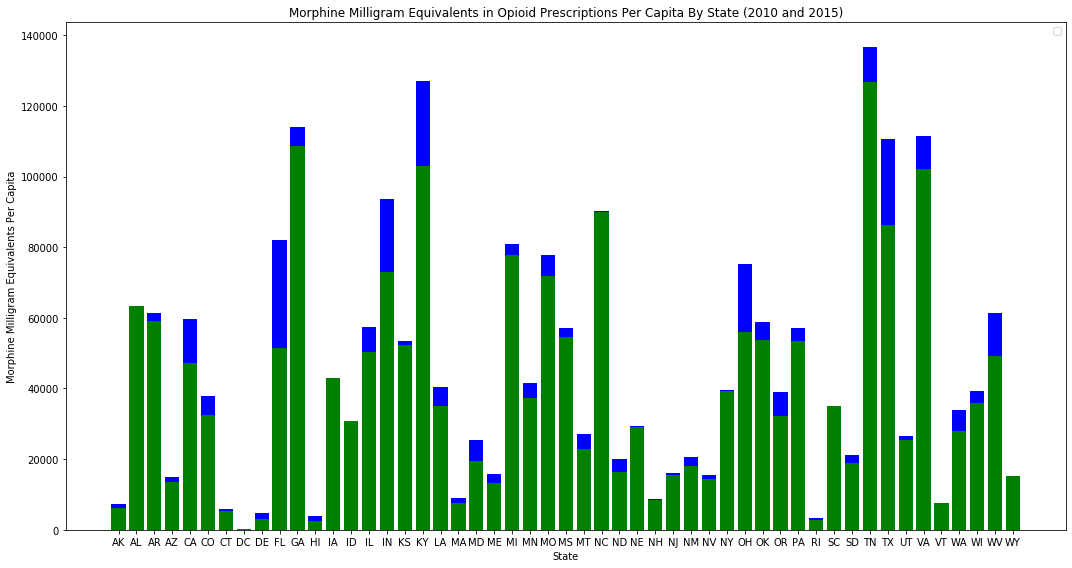

In [10]:
#create barchart
plt.figure(figsize=(15,8))
data_2010=plt.bar(state_df["State"],state_df["MME_PerCap_2010"], color="b")
data_2015=plt.bar(state_df["State"],state_df["MME_PerCap_2015"], color="g")
plt.title("Morphine Milligram Equivalents in Opioid Prescriptions Per Capita By State (2010 and 2015)")
plt.ylabel("Morphine Milligram Equivalents Per Capita")
plt.xlabel("State")
plt.tight_layout()
plt.legend(handles=[data_2010, data_2015], loc="best")
plt.show()